<a href="https://colab.research.google.com/github/AchiengMary/Fraudelent_detection/blob/main/version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data  train.zip


In [2]:
!ls

sample_data  SampleSubmission.csv  test.zip  train.zip


In [3]:
!unzip "train.zip" -d "/content/train/"
!unzip "test.zip" -d "/content/test/"

Archive:  train.zip
  inflating: /content/train/client_train.csv  
  inflating: /content/train/invoice_train.csv  
Archive:  test.zip
  inflating: /content/test/client_test.csv  
  inflating: /content/test/invoice_test.csv  


In [4]:
!ls /content/train/
!ls /content/test/

client_train.csv  invoice_train.csv
client_test.csv  invoice_test.csv


In [5]:
import pandas as pd
import numpy as np

In [6]:
# Training data
client_train = pd.read_csv('/content/train/client_train.csv')
invoice_train = pd.read_csv('/content/train/invoice_train.csv')

# Testing data
client_test = pd.read_csv('/content/test/client_test.csv')
invoice_test = pd.read_csv('/content/test/invoice_test.csv')

submission_data = pd.read_csv('/content/SampleSubmission.csv')

# Preview data
print("Client Train Data Preview:\n", client_train.head())
print("Invoice Train Data Preview:\n", invoice_train.head())
print("Client Test Data Preview:\n", client_test.head())
print("Invoice Test Data Preview:\n", invoice_test.head())
print("Submission Data Preview:\n", submission_data.head())

<ipython-input-6-cea88d97fe57>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('/content/train/invoice_train.csv')


Client Train Data Preview:
    disrict          client_id  client_catg  region creation_date  target
0       60     train_Client_0           11     101    31/12/1994     0.0
1       69     train_Client_1           11     107    29/05/2002     0.0
2       62    train_Client_10           11     301    13/03/1986     0.0
3       69   train_Client_100           11     105    11/07/1996     0.0
4       62  train_Client_1000           11     303    14/10/2014     0.0
Invoice Train Data Preview:
         client_id invoice_date  tarif_type  counter_number counter_statue  \
0  train_Client_0   2014-03-24          11         1335667              0   
1  train_Client_0   2013-03-29          11         1335667              0   
2  train_Client_0   2015-03-23          11         1335667              0   
3  train_Client_0   2015-07-13          11         1335667              0   
4  train_Client_0   2016-11-17          11         1335667              0   

   counter_code  reading_remarque  counter

In [7]:
print("Client Train Shape:", client_train.shape)
print("Invoice Train Shape:", invoice_train.shape)
print("Client Test Shape:", client_test.shape)
print("Invoice Test Shape:", invoice_test.shape)

Client Train Shape: (135493, 6)
Invoice Train Shape: (4476749, 16)
Client Test Shape: (58069, 5)
Invoice Test Shape: (1939730, 16)


In [8]:
print("Missing Values in Client Train:\n", client_train.isnull().sum())
print("Missing Values in Invoice Train:\n", invoice_train.isnull().sum())
print("Missing Values in Client Test:\n", client_test.isnull().sum())
print("Missing Values in Invoice Test:\n", invoice_test.isnull().sum())

Missing Values in Client Train:
 disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64
Missing Values in Invoice Train:
 client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64
Missing Values in Client Test:
 disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
dtype: int64
Missing Values in Invoice Test:
 client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient   

In [9]:
print("Client Train Data Types:\n", client_train.dtypes)
print("Invoice Train Data Types:\n", invoice_train.dtypes)

Client Train Data Types:
 disrict            int64
client_id         object
client_catg        int64
region             int64
creation_date     object
target           float64
dtype: object
Invoice Train Data Types:
 client_id               object
invoice_date            object
tarif_type               int64
counter_number           int64
counter_statue          object
counter_code             int64
reading_remarque         int64
counter_coefficient      int64
consommation_level_1     int64
consommation_level_2     int64
consommation_level_3     int64
consommation_level_4     int64
old_index                int64
new_index                int64
months_number            int64
counter_type            object
dtype: object


In [10]:
print("Client Train Unique IDs:", client_train['client_id'].nunique())
print("Invoice Train Unique IDs:", invoice_train['client_id'].nunique())

Client Train Unique IDs: 135493
Invoice Train Unique IDs: 135493


In [11]:
print("Client Train Summary:\n", client_train.describe())
print("Invoice Train Summary:\n", invoice_train.describe())

Client Train Summary:
              disrict    client_catg         region         target
count  135493.000000  135493.000000  135493.000000  135493.000000
mean       63.511222      11.512506     206.159809       0.055841
std         3.354400       4.423761     104.207044       0.229614
min        60.000000      11.000000     101.000000       0.000000
25%        62.000000      11.000000     103.000000       0.000000
50%        62.000000      11.000000     107.000000       0.000000
75%        69.000000      11.000000     307.000000       0.000000
max        69.000000      51.000000     399.000000       1.000000
Invoice Train Summary:
          tarif_type  counter_number  counter_code  reading_remarque  \
count  4.476749e+06    4.476749e+06  4.476749e+06      4.476749e+06   
mean   2.012804e+01    1.230587e+11  1.724884e+02      7.321702e+00   
std    1.347256e+01    1.657267e+12  1.338871e+02      1.571654e+00   
min    8.000000e+00    0.000000e+00  0.000000e+00      5.000000e+00   
25% 

In [12]:
# Show the first few rows of the train and test datasets
client_train.head(), invoice_train.head(), client_test.head(), invoice_test.head()

(   disrict          client_id  client_catg  region creation_date  target
 0       60     train_Client_0           11     101    31/12/1994     0.0
 1       69     train_Client_1           11     107    29/05/2002     0.0
 2       62    train_Client_10           11     301    13/03/1986     0.0
 3       69   train_Client_100           11     105    11/07/1996     0.0
 4       62  train_Client_1000           11     303    14/10/2014     0.0,
         client_id invoice_date  tarif_type  counter_number counter_statue  \
 0  train_Client_0   2014-03-24          11         1335667              0   
 1  train_Client_0   2013-03-29          11         1335667              0   
 2  train_Client_0   2015-03-23          11         1335667              0   
 3  train_Client_0   2015-07-13          11         1335667              0   
 4  train_Client_0   2016-11-17          11         1335667              0   
 
    counter_code  reading_remarque  counter_coefficient  consommation_level_1  \
 0  

In [13]:
client_train.info(), invoice_train.info(), client_test.info(), invoice_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommati

(None, None, None, None)

In [14]:
# Summary statistics for the train and test datasets
client_train.describe(), invoice_train.describe(), client_test.describe(), invoice_test.describe()

(             disrict    client_catg         region         target
 count  135493.000000  135493.000000  135493.000000  135493.000000
 mean       63.511222      11.512506     206.159809       0.055841
 std         3.354400       4.423761     104.207044       0.229614
 min        60.000000      11.000000     101.000000       0.000000
 25%        62.000000      11.000000     103.000000       0.000000
 50%        62.000000      11.000000     107.000000       0.000000
 75%        69.000000      11.000000     307.000000       0.000000
 max        69.000000      51.000000     399.000000       1.000000,
          tarif_type  counter_number  counter_code  reading_remarque  \
 count  4.476749e+06    4.476749e+06  4.476749e+06      4.476749e+06   
 mean   2.012804e+01    1.230587e+11  1.724884e+02      7.321702e+00   
 std    1.347256e+01    1.657267e+12  1.338871e+02      1.571654e+00   
 min    8.000000e+00    0.000000e+00  0.000000e+00      5.000000e+00   
 25%    1.100000e+01    1.211080e+05

In [15]:
# Merge the training datasets on client_id
train_data = pd.merge(invoice_train, client_train, on='client_id', how='inner')

# Merge the test datasets on client_id
test_data = pd.merge(invoice_test, client_test, on='client_id', how='inner')

# Check the shapes of the merged datasets
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (4476749, 21)
Test Data Shape: (1939730, 20)


In [16]:
# Check for missing values in the train and test datasets
train_missing = train_data.isnull().sum()
test_missing = test_data.isnull().sum()

print("Missing values in train data:\n", train_missing)
print("\nMissing values in test data:\n", test_missing)

Missing values in train data:
 client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
disrict                 0
client_catg             0
region                  0
creation_date           0
target                  0
dtype: int64

Missing values in test data:
 client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number  

          old_index     new_index  months_number  counter_coefficient  \
count  4.476749e+06  4.476749e+06   4.476749e+06         4.476749e+06   
mean   1.776700e+04  1.834970e+04   4.483095e+01         1.003040e+00   
std    4.036693e+04  4.095321e+04   3.128335e+03         3.083466e-01   
min    0.000000e+00  0.000000e+00   0.000000e+00         0.000000e+00   
25%    1.791000e+03  2.056000e+03   4.000000e+00         1.000000e+00   
50%    7.690000e+03  8.192000e+03   4.000000e+00         1.000000e+00   
75%    2.166000e+04  2.234300e+04   4.000000e+00         1.000000e+00   
max    2.800280e+06  2.870972e+06   6.366240e+05         5.000000e+01   

       consommation_level_1  consommation_level_2  consommation_level_3  \
count          4.476749e+06          4.476749e+06          4.476749e+06   
mean           4.109795e+02          1.093225e+02          2.030620e+01   
std            7.573080e+02          1.220123e+03          1.574239e+02   
min            0.000000e+00          0.000

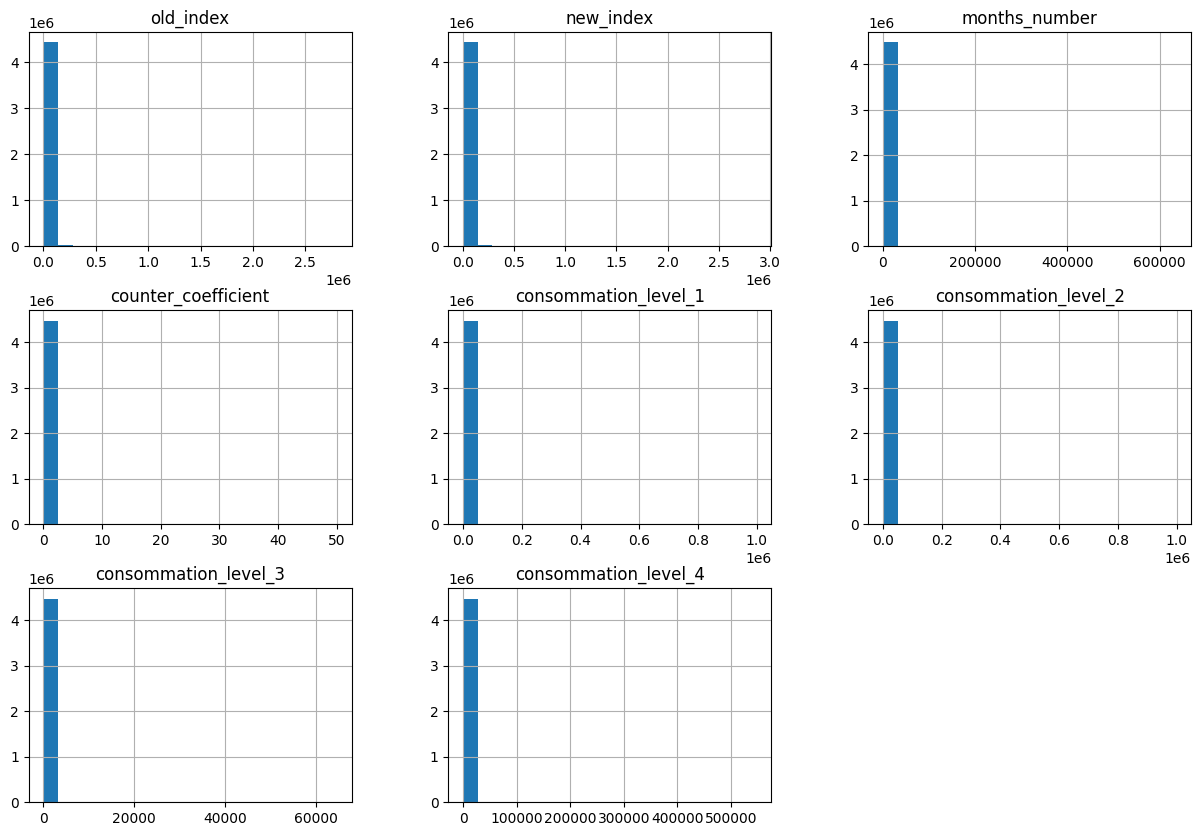

In [17]:
# Summary statistics for numerical features
numerical_cols = ['old_index', 'new_index', 'months_number', 'counter_coefficient',
                  'consommation_level_1', 'consommation_level_2', 'consommation_level_3',
                  'consommation_level_4']

print(train_data[numerical_cols].describe())

# Plot histograms for numerical features
import matplotlib.pyplot as plt

train_data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.show()

In [18]:
# Frequency distribution of categorical columns
categorical_cols = ['disrict', 'client_catg', 'region']

for col in categorical_cols:
    print(f"Distribution of {col} in train data:\n", train_data[col].value_counts())
    print()

Distribution of disrict in train data:
 disrict
62    1332064
63    1077835
69    1076942
60     989908
Name: count, dtype: int64

Distribution of client_catg in train data:
 client_catg
11    4304888
51     103932
12      67929
Name: count, dtype: int64

Distribution of region in train data:
 region
101    1069268
311     509808
104     400665
301     316404
107     303450
103     294480
303     197946
306     195225
310     165366
312     156196
304     146516
302     143970
309     128819
305      94276
307      85531
313      76926
105      53131
371      53021
308      28699
106      24212
372      17013
379      13255
399       1566
206       1004
199          2
Name: count, dtype: int64



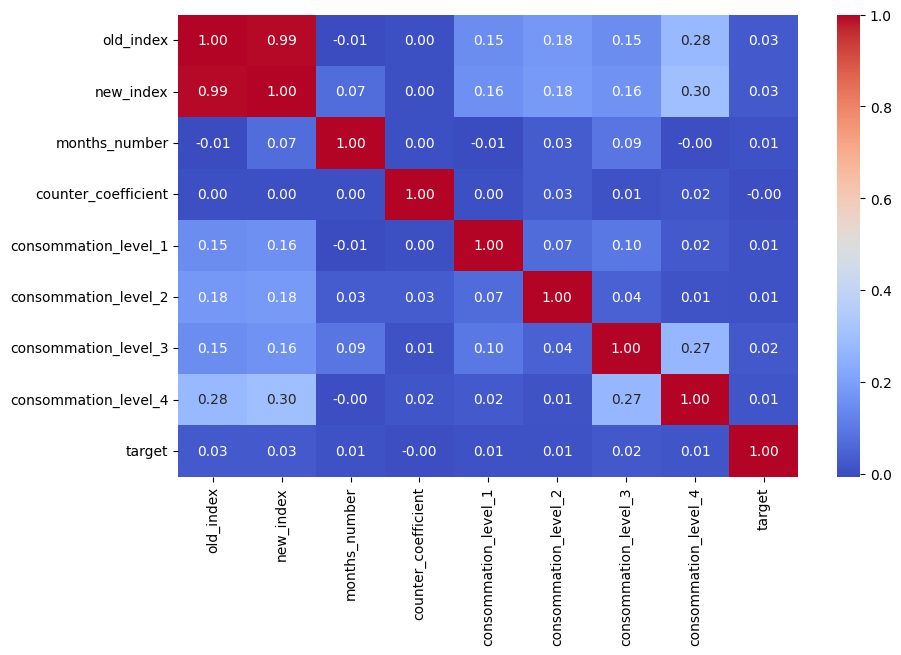

In [19]:
# Plot correlations between numerical features and target
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(train_data[numerical_cols + ['target']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

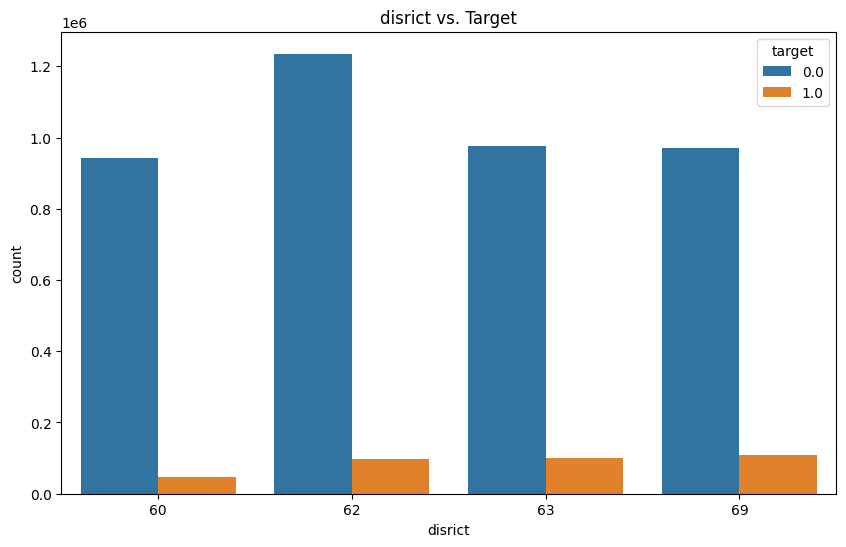

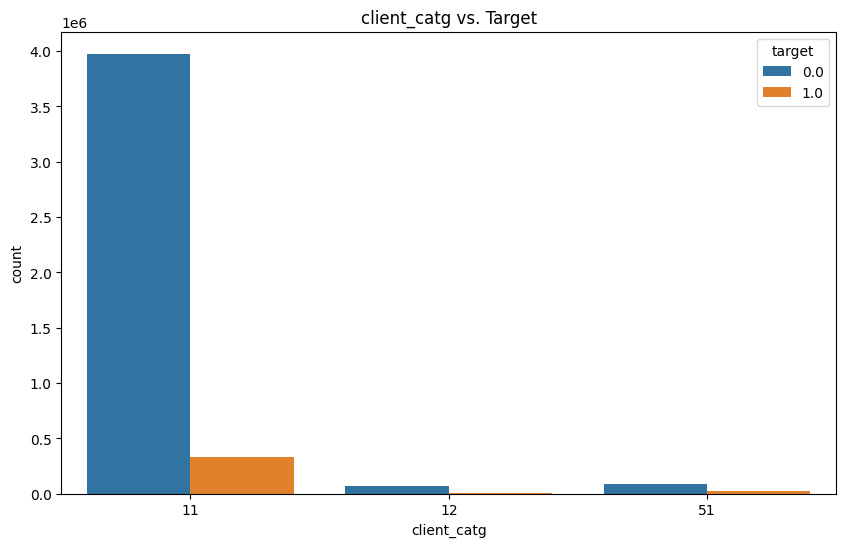

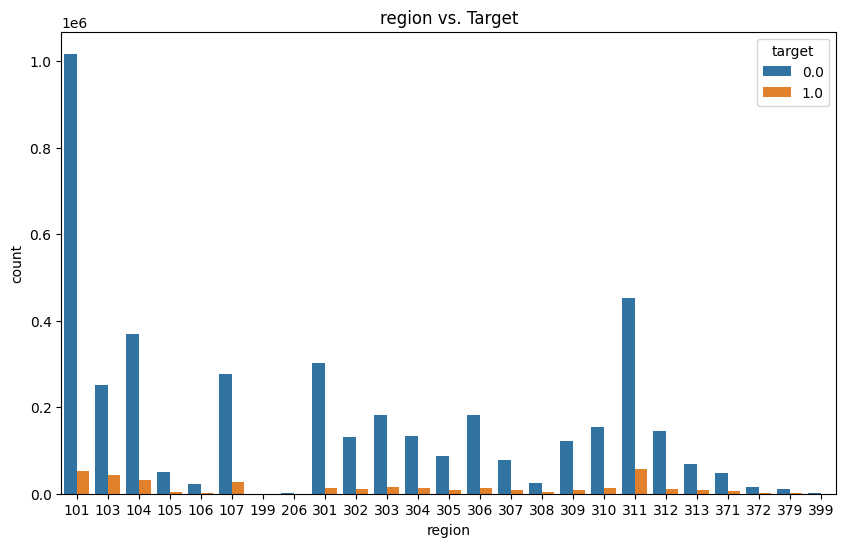

In [20]:
# Categorical vs. Target
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=col, hue='target')
    plt.title(f'{col} vs. Target')
    plt.show()

<ipython-input-21-90d520c0ff2a>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data['creation_date'] = pd.to_datetime(train_data['creation_date'])


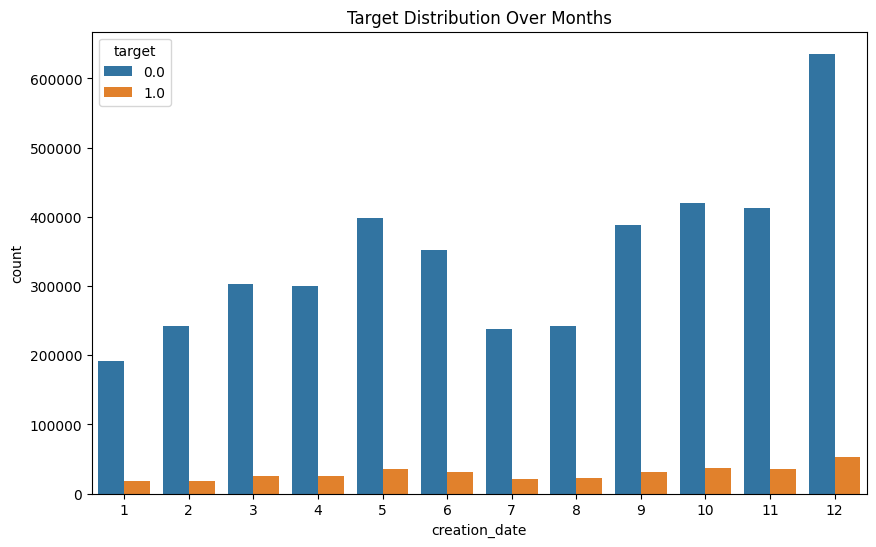

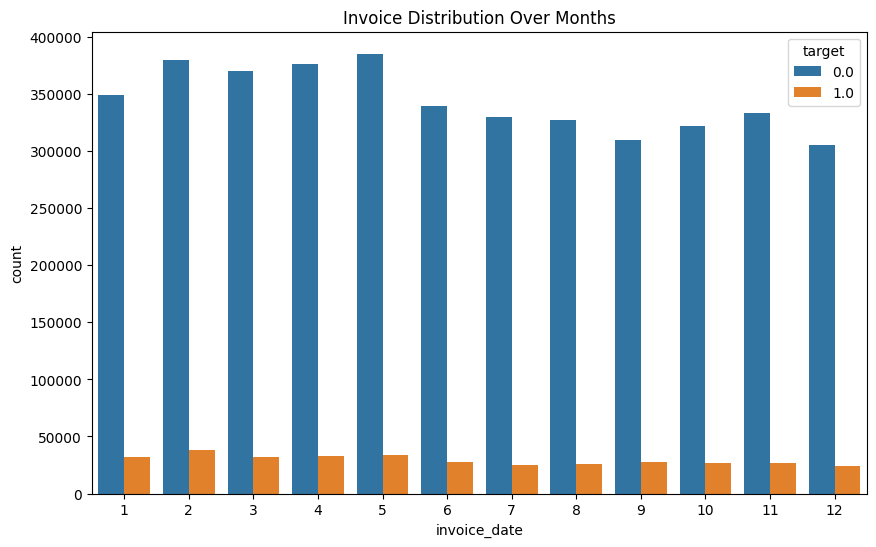

In [21]:
# Convert invoice_date and creation_date to datetime
train_data['invoice_date'] = pd.to_datetime(train_data['invoice_date'])
train_data['creation_date'] = pd.to_datetime(train_data['creation_date'])

# Plot target distribution over time (e.g., creation_date)
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x=train_data['creation_date'].dt.month, hue='target')
plt.title('Target Distribution Over Months')
plt.show()

# Check for seasonality in invoice_date
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x=train_data['invoice_date'].dt.month, hue='target')
plt.title('Invoice Distribution Over Months')
plt.show()

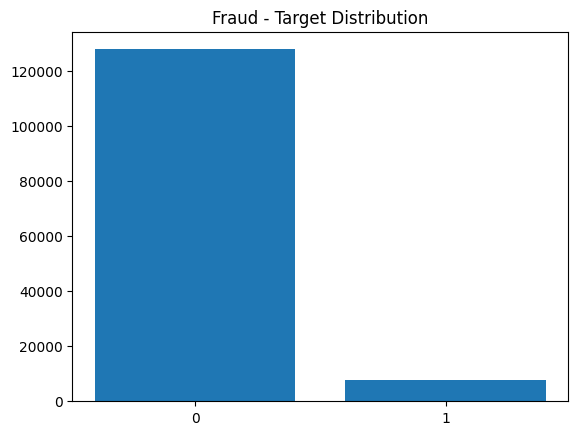

In [22]:
#Visualize fraudulent activities
fraudactivities = client_train.groupby(['target'])['client_id'].count()
plt.bar(x=fraudactivities.index, height=fraudactivities.values, tick_label = [0,1])
plt.title('Fraud - Target Distribution')
plt.show()

In [23]:
# Separate features (X) and target (y)
X_train = train_data.drop(columns=['target'])  # Drop the target column from the features
y_train = train_data['target']  # The target column is stored in y_train

In [24]:
# Check column types
print(X_train.dtypes)

client_id                       object
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
disrict                          int64
client_catg                      int64
region                           int64
creation_date           datetime64[ns]
dtype: object


In [25]:
X_train = X_train.drop(columns=['client_id'])

In [26]:
# Convert the 'counter_statue' column to a uniform data type (string) before applying Label Encoding.
X_train['counter_statue'] = X_train['counter_statue'].astype(str)
X_train['counter_type'] = X_train['counter_type'].astype(str)  # Do the same for 'counter_type' if needed

#Now apply Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_train['counter_statue'] = label_encoder.fit_transform(X_train['counter_statue'])
X_train['counter_type'] = label_encoder.fit_transform(X_train['counter_type'])

In [27]:
!pip install -U scikit-learn
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Drop or encode non-numerical features
X_train = X_train.drop(columns=['invoice_date', 'creation_date'])  # Drop these columns

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical features
for col in ['counter_statue', 'counter_type', 'disrict', 'client_catg', 'region']:
    X_train[col] = X_train[col].astype(str)  # Ensure the column is of type string
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Resampled class distribution:", pd.Series(y_resampled).value_counts())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate performance
y_pred = model.predict(X_train_array)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Print the classification report
print(classification_report(y_train_array, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_train_array, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_train_array, model.predict_proba(X_train_array)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")